### Getting Started
- Create virtual environment

`python -m venv .venv`

- Activate virtual environment (on Windows)

`.venv\Scripts\activate.bat`

- Install Python libraries

`pip install -r requirements.txt`

- Create .env file with following variables. Use values appropriate to your environment

```
AZURE_OPENAI_ENDPOINT = "https://<REPLACE_ME>.openai.azure.com/"

AZURE_OPENAI_API_KEY = "<REPLACE_ME>"

AZURE_OPENAI_DALL_E_DEPLOYMENT = "<REPLACE_ME>"
```


### Import libraries

In [1]:
from openai import AzureOpenAI
import os
import requests
from PIL import Image
import json
from dotenv import load_dotenv
from IPython.display import display

### Load environment variables from .env file

In [2]:
load_dotenv(".env")

True

### Create Azure OpenAI client

In [3]:
client = AzureOpenAI(
    api_version="2024-02-01",  
    api_key=os.environ["AZURE_OPENAI_API_KEY"],  
    azure_endpoint=os.environ['AZURE_OPENAI_ENDPOINT']
)

### Generate image

In [4]:

def generate_image_from_text(prompt):
    result = client.images.generate(
        model=os.environ["AZURE_OPENAI_DALL_E_DEPLOYMENT"], # the name of your DALL-E 3 deployment
        prompt=prompt,
        n=1
    )
    print(f'Original prompt: {prompt}')
    print(f'Revised prompt: {result.data[0].revised_prompt}')
    return result

### Save image

In [5]:
def save_image(dall_e_result, image_dir="images"):

    json_response = json.loads(dall_e_result.model_dump_json())

    # Set the directory for the stored image
    image_dir = os.path.join(os.curdir, image_dir)

    # If the directory doesn't exist, create it
    if not os.path.isdir(image_dir):
        os.mkdir(image_dir)

    # Initialize the image path (note the filetype should be png)
    image_path = os.path.join(image_dir, 'generated_image.png')

    # Retrieve the generated image
    image_url = json_response["data"][0]["url"]  # extract image URL from response
    generated_image = requests.get(image_url).content  # download the image
    with open(image_path, "wb") as image_file:
        image_file.write(generated_image)
    return image_path


### Prompt 1

Original prompt: a close-up of a black wolf walking throughthe forest
Revised prompt: A detailed close-up of a majestic black wolf traversing through the dense undergrowth of the forest, its keen eyes alert and sharply focused on its surroundings. The dappling effect of sunlight breaking through the canopy, casting a mottled pattern of shadows on its sleek midnight-black fur.


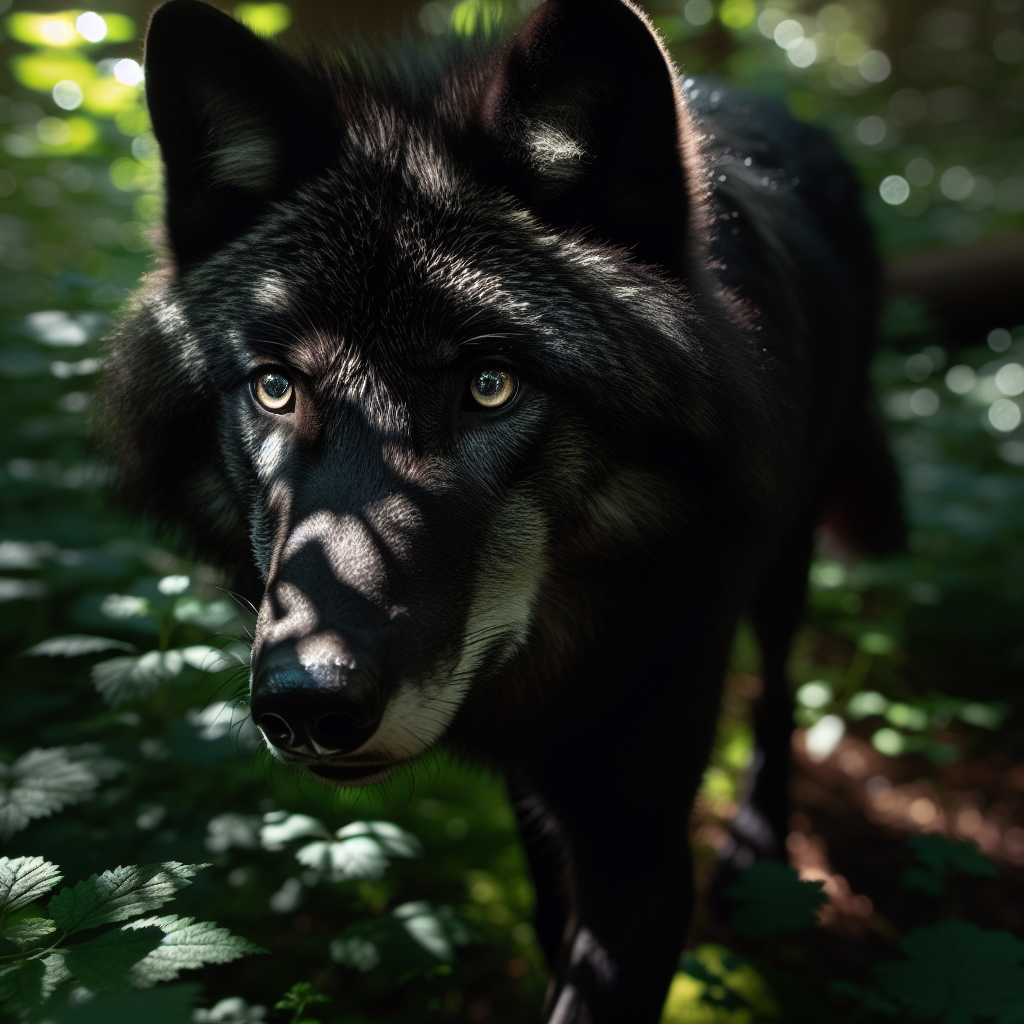

In [6]:
prompt = "a close-up of a black wolf walking throughthe forest"
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)

### Prompt 2

Original prompt: Nestle Nespresso coffee machine, pink, with a cup of coffee on the side
Revised prompt: A stylish Nestle Nespresso coffee machine, painted in a soft shade of pink, immaculately cleaned and ready for use. Next to it, there's a freshly prepared cup of aromatic coffee releasing inviting and tantalizing smell, placed on a matching saucer.


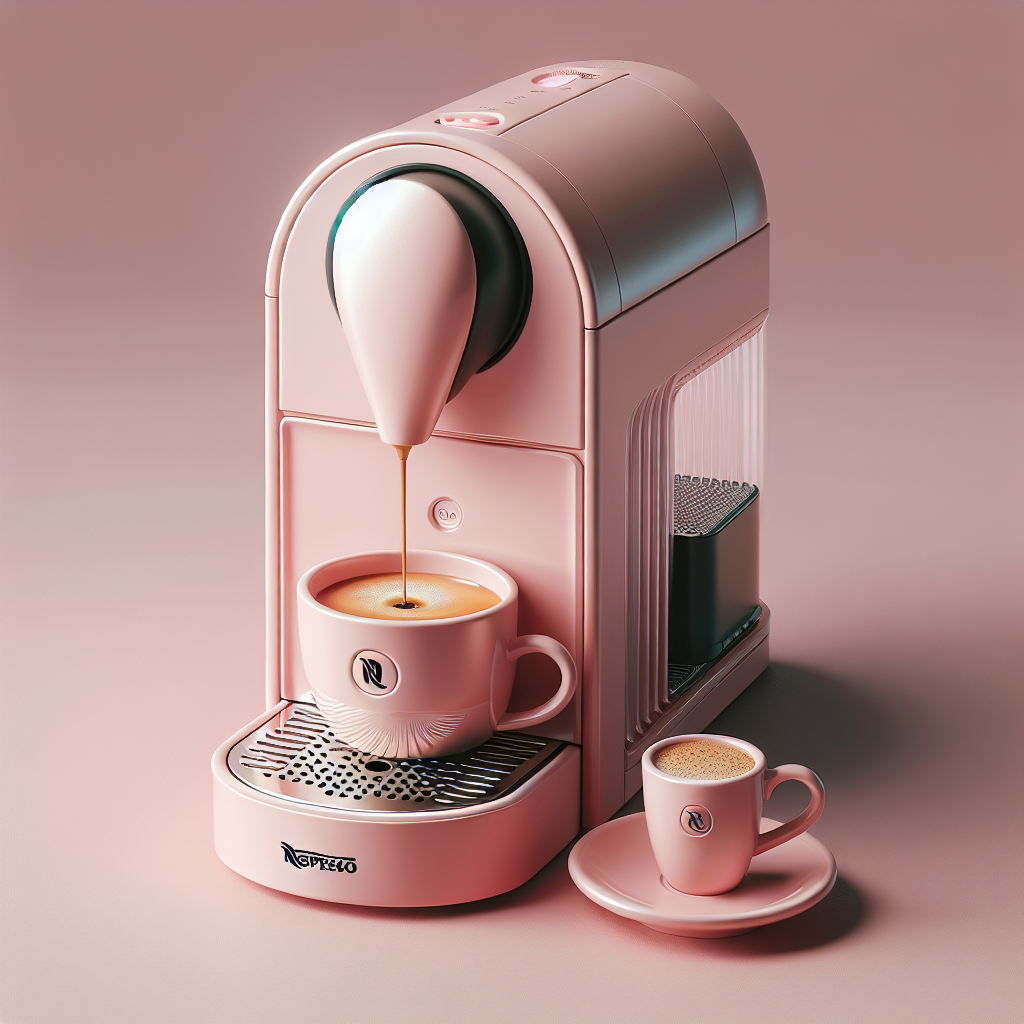

In [7]:
prompt = "Nestle Nespresso coffee machine, pink, with a cup of coffee on the side"
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)

### Prompt 3 (try to force original prompt)

Original prompt: 
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:
Nestle Nespresso coffee machine, pink, with a cup of coffee on the side

Revised prompt: Nestle Nespresso coffee machine, pink, with a cup of coffee on the side


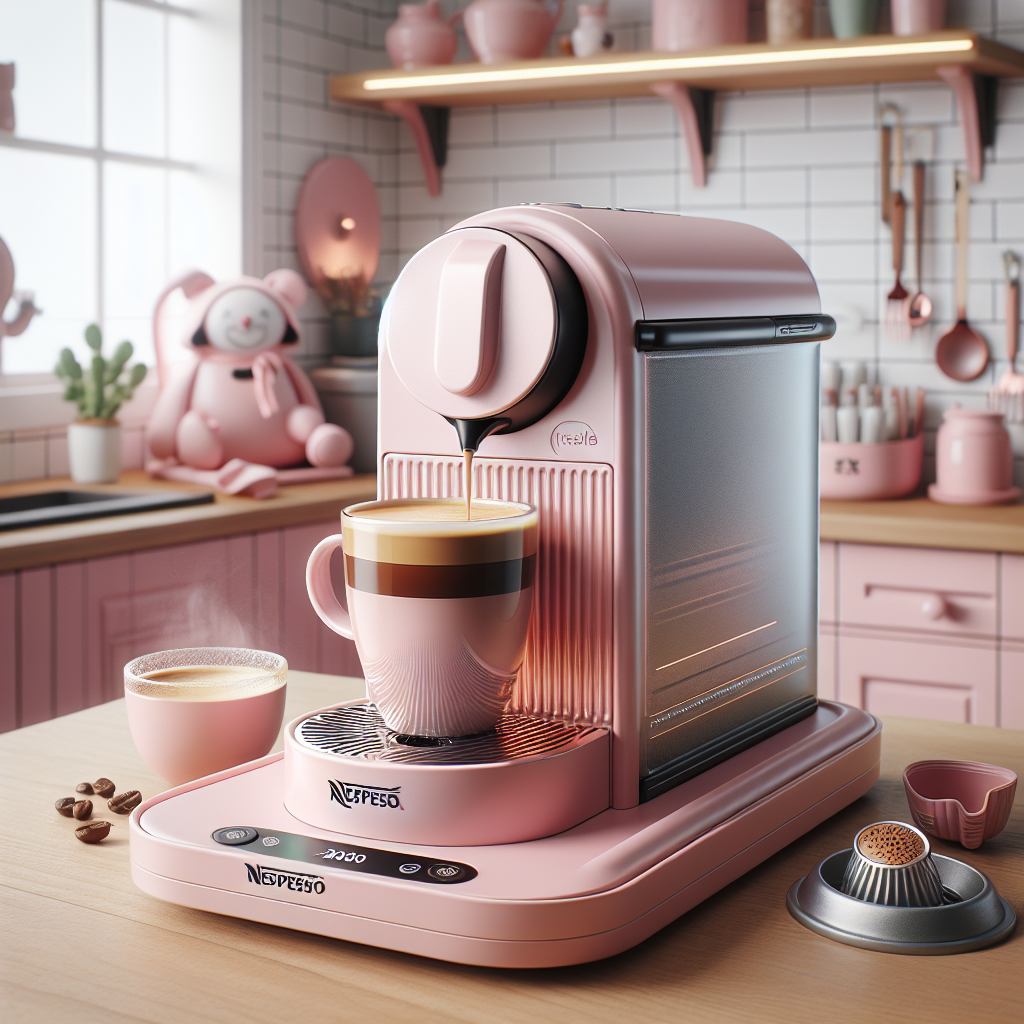

In [8]:
prompt = """
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:
Nestle Nespresso coffee machine, pink, with a cup of coffee on the side
"""
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)